> # Innis Classification Project
>>By Stephen Kipkurui

>### Project Walk-through

In [180]:
# Python import libraries for statistical infference, manipulations and visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import env
import acquireTelco
import prepareTelco

from acquireTelco import get_telco_data
from acquireTelco import clean_train_data
from acquireTelco import clean_validate_data
from acquireTelco import clean_test_data
from prepareTelco import clean_split_telco_data


import warnings
warnings.filterwarnings('ignore')


import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

> ### Acquire the required data from telco_churn database and cache a local copy 

> ##### Date of acquire: 03/10/2022 - 10:00am

In [181]:
# Call acquire module and call function get_telco data to get telco data

telco = acquireTelco.get_telco_data() 


	Program Status: Reading Raw Telco Data from a local cached csv file...


> ### Initial review of data, structures, types and columns 

In [185]:
# Examine the telco dataframe 

telco.head()

,churn,gender,tenure,partner,senior_citizen,dependents,phone_service,multiple_lines,internet_service_type,contract_type,...,total_charges,payment_type,enc_churn,enc_partner,enc_dependents,enc_phone_service,enc_paperless_billing,enc_payment,enc_contract_type,enc_intenet_service_type
0,No,Female,9,Yes,0,Yes,Yes,No,DSL,One year,...,542.40,Mailed check,0,1,1,1,1,2,2,1
1,No,Female,9,Yes,0,Yes,Yes,No,DSL,One year,...,593.30,Mailed check,0,1,1,1,1,2,2,1
2,No,Male,9,No,0,No,Yes,Yes,DSL,Month-to-month,...,542.40,Mailed check,0,0,0,1,0,2,1,1
3,No,Male,9,No,0,No,Yes,Yes,DSL,Month-to-month,...,593.30,Mailed check,0,0,0,1,0,2,1,1
4,Yes,Male,4,No,0,No,Yes,No,Fiber optic,Month-to-month,...,280.85,Electronic check,1,0,0,1,1,1,1,2


In [186]:
# Get datatype infomation on the telco data

telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892189 entries, 0 to 12892188
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   churn                     object 
 1   gender                    object 
 2   tenure                    int64  
 3   partner                   object 
 4   senior_citizen            int64  
 5   dependents                object 
 6   phone_service             object 
 7   multiple_lines            object 
 8   internet_service_type     object 
 9   contract_type             object 
 10  paperless_billing         object 
 11  tech_support              object 
 12  monthly_charges           float64
 13  total_charges             float64
 14  payment_type              object 
 15  enc_churn                 int64  
 16  enc_partner               int64  
 17  enc_dependents            int64  
 18  enc_phone_service         int64  
 19  enc_paperless_billing     int64  
 20  enc_payment           

>## Exploratory Data Analysis 

>#### PURPOSE:  - Explore data to discover driver(s) for churn  on our target variables 


>###  Clean, encode categorical data and split into train, validate, and test 


> #### Data encoding key:
>#### Binary categorical data
>>- ##### 'Yes' == 1 , 'No' == 0
>#### Multivariate categorical data
>>### Pay:
>>- ##### 'Electronic pay' == 1 , 'Mailed check' == 2, 'Bank transfer' == 3, 'Credit card' == 4
>### Contract type:
>>- ##### 'Month-to-month' == 1 , 'One year contract' == 2, 'two-year_contract' == 3
>- #### NOTE: prefix **'enc_name'** means encoded binary categorical data

In [187]:
# Split data and save separate files of train, validate, test

train, validate, test = clean_split_telco_data(telco)

# Verify split ratios 

print(f'\n\tTrain Data: {train.shape} \n\tValidate Data:{validate.shape}\n\tTest Data: {test.shape}')


	Train Data: (5497669, 14) 
	Validate Data:(2463974, 14)
	Test Data: (2064720, 14)


> #### Freshly aquire train, validate, & split dataset from local files (faster loading)


In [188]:
train_df = clean_train_data() # acquire cleaned train dataset
validate_df = clean_validate_data()# acquire cleaned validated dataset
test_df = clean_test_data()# acquire cleaned test dataset


	Program Status: Reading cleaned train data from a local cached csv file...

	Program Status: Reading cleaned validate data from a local cached csv file...

	Program Status: Reading cleaned test data from a local cached csv file...


In [189]:
# Examine dataset 

train_df.head(3)

,churn,tenure,multiple_lines,tech_support,monthly_charges,total_charges,enc_churn,enc_partner,enc_dependents,enc_phone_service,enc_paperless_billing,enc_payment,enc_contract_type,enc_intenet_service_type
0,No,39,No,No internet service,73.85,401.30,0,0,0,1,0,2,3,3
1,No,72,Yes,Yes,74.25,4859.25,0,1,0,1,1,3,3,1
2,No,68,Yes,No internet service,35.05,35.05,0,1,1,1,0,2,3,3


In [190]:
validate_df.head(3)

,churn,tenure,multiple_lines,tech_support,monthly_charges,total_charges,enc_churn,enc_partner,enc_dependents,enc_phone_service,enc_paperless_billing,enc_payment,enc_contract_type,enc_intenet_service_type
0,No,72,No phone service,Yes,109.45,6144.55,0,1,1,0,0,3,3,1
1,No,40,No,No,85.35,758.60,0,1,0,1,0,1,2,2
2,No,61,No,Yes,99.85,1776.95,0,1,1,1,1,3,3,1


In [191]:
test_df.head(3)

,churn,tenure,multiple_lines,tech_support,monthly_charges,total_charges,enc_churn,enc_partner,enc_dependents,enc_phone_service,enc_paperless_billing,enc_payment,enc_contract_type,enc_intenet_service_type
0,No,62,No,Yes,60.3,3563.8,0,1,0,1,1,4,3,1
1,Yes,27,No phone service,No,111.3,7567.2,1,1,0,0,0,3,1,1
2,No,69,No phone service,No,71.1,4140.1,0,1,1,0,1,4,3,1


In [192]:
# Check categorical data

train_categorical = [col for col in train_df.columns if train_df[col].dtype  == 'O']
train_categorical

['churn', 'multiple_lines', 'tech_support']

In [193]:
train_df.dtypes

churn                        object
tenure                        int64
multiple_lines               object
tech_support                 object
monthly_charges             float64
total_charges               float64
enc_churn                     int64
enc_partner                   int64
enc_dependents                int64
enc_phone_service             int64
enc_paperless_billing         int64
enc_payment                   int64
enc_contract_type             int64
enc_intenet_service_type      int64
dtype: object

# Project Features of interest:

>> -  How does **churn** rate vary?
>> -  **Billing format**, in theory may play big role in churning, can we find any effect of this feature?
>> -  Do **phone service** affect churn rate?
>#### Visualize relationship of categorical variables relatioships to target variable
> (using **train data set** moving forward)

### Initial Hypothesis 


#### Ho: Phone customers utlizing paperless billing  are less likely to churn than phone customers who do not


#### H1: Phone customers utlizing paperless billing  are likely to churn than phone customers who do not

> # Visualize features relationships 

>## Visualize Distributions: 
>>### A. Overall churned vs non-churned customers
>>### B. Overall paperless vs non paperless customers
>>### C. Overall phone customers

>## Dive deeper:
>>### D. Churned vs non-churned paperless billing customers
>>### E. Phone customers using paperless billing

In [194]:
# Overall train Churned customers (1) vs un-churned customers (0)

train_df.enc_churn.value_counts()

0    4157294
1    1340375
Name: enc_churn, dtype: int64

>### Create churn vs non-churn customers datasets

In [238]:
# churned dataset

churned_df = train_df[train_df.enc_churn == 1]
non_churned_df = train_df[train_df.enc_churn == 0]

### Step I. Overall churn rate 

<function matplotlib.pyplot.show(close=None, block=None)>

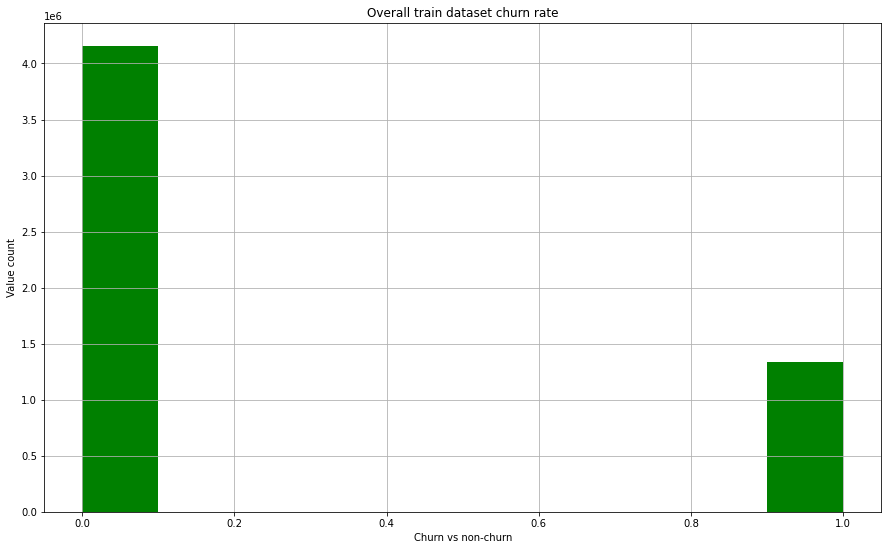

In [254]:
# Histogram (train dataset churn rate)

plt.figure(figsize = (15, 9))
plt.title('Overall train dataset churn rate')

train_df.enc_churn.hist(color = 'green')
plt.ylabel('Value count')
plt.xlabel('Churn vs non-churn')
plt.show

### KEY: 

### '1' == Churn

### '0' != churn


>### --->  OBSERVATION: Overall [ 1 in 3 ] customer did not churned. 

> #### Are we doing well?


## Step II. Expore overall paperless billing distribution 

<function matplotlib.pyplot.show(close=None, block=None)>

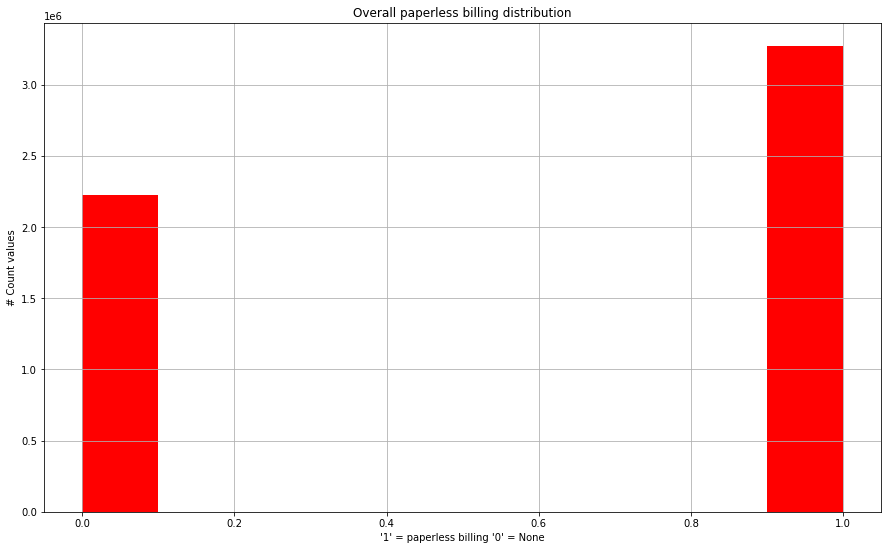

In [255]:
# Histogram (Proportion of paperless billing customers)

plt.figure(figsize = (15, 9))
plt.title('Overall paperless billing distribution')
train_df.enc_paperless_billing.hist(color = 'red')
plt.ylabel('# Count values')
plt.xlabel('\'1\' = paperless billing \'0\' = None')

plt.show

### --> Obeservation: Approximately 60% of Telco customers are using paperless billing


### Let's explore this group of our data further...

In [230]:
# churned paperless billing 

churned_paperless_bill = train_df[train_df.enc_churn == 1].enc_paperless_billing

<function matplotlib.pyplot.show(close=None, block=None)>

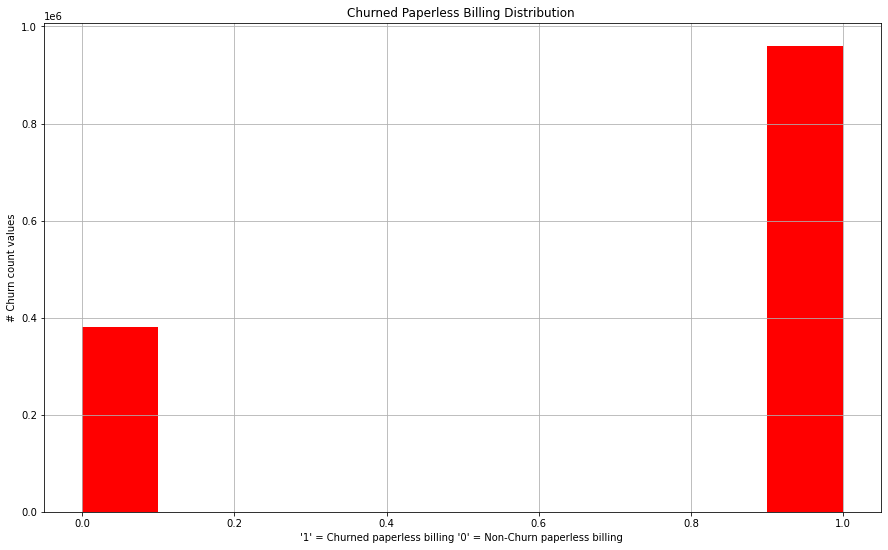

In [256]:
# Histogram (Proportion of phone services customers)

plt.figure(figsize = (15, 9))
plt.title('Churned Paperless Billing Distribution ')
churned_paperless_bill.hist(color = 'red')
plt.ylabel('# Churn count values')
plt.xlabel('\'1\' = Churned paperless billing \'0\' = Non-Churn paperless billing ')

plt.show

>### ---> OBSERVATION: Almost twice churn rate among paperless billing

## Deeper Examinations

>>### Examine Papeless Billing Comparance:
>>### (churned vs non-churned)

In [223]:

churned_paperless_billed_mean = churned_df.enc_paperless_billing.mean()

non_churned_paperless_billed_mean = non_churned_df.enc_paperless_billing.mean()

plt.figure(figsize = (15, 10))
print()
print(f'Churned customers using Paperless billing (mean): {churned_paperless_billed_mean:.2%}')
print()
print(f'Non-Churned customers using Paperless billing (mean): {non_churned_paperless_billed_mean:.2%}')
print()
print('------------------------------------------')
print('--->  [[OBSERVATION]]: Equal proportion of churn vs no churn among phone customers alone')
print('------------------------------------------')



Churned customers using Paperless billing (mean): 71.63%

Non-Churned customers using Paperless billing (mean): 55.61%

------------------------------------------
--->  [[OBSERVATION]]: Equal proportion of churn vs no churn among phone customers alone
------------------------------------------


<Figure size 1080x720 with 0 Axes>

>>### How about Phone Customers using paperless billing? 
>>### (churned vs non-churned)

In [202]:


churned_paperless_billing = churned_df[churned_df.enc_paperless_billing == 1]
non_churn_paperless_billing = churned_df[churned_df.enc_paperless_billing == 0]


churned_paperless_phone= churned_paperless_billing.enc_phone_service
non_churned_paperless_phone= non_churn_paperless_billing.enc_phone_service

churned_paperless_bill_phone_service = churned_paperless_billing.enc_phone_service.mean()
non_churned_paperless_bill_phone_service = non_churn_paperless_billing.enc_phone_service.mean()

plt.figure(figsize = (15, 10))
print()
print(f'Churned phone customers using paperless billing (mean): {churned_paperless_bill_phone_service:.2%}')
print()
print(f'Non-Churned Phone customers using paperless billing (mean): {non_churned_paperless_bill_phone_service:.2%}')
print()
print('------------------------------------------')
print('--->  OBSERVATION: Slight increase in churn among these customers')
print('------------------------------------------')


Churned phone customers using paperless billing (mean): 89.58%

Non-Churned Phone customers using paperless billing (mean): 88.42%

------------------------------------------
--->  OBSERVATION: Slight increase in churn among these customers
------------------------------------------


<Figure size 1080x720 with 0 Axes>

> ## Key Observations

>-  Phone service and paperless billing appears to have the greatest churn rate 
>-  Overall: Churning customers is approximately 1/3 of non-churning customers
>-  Overall: churned phone customers 

>-  There is a spike in churn with customers using paperless billing
>-  Of the customers, using paperless billing, phone customers among these group show approximately 2% increased churn

# Why are paperless billing less prefferable? 

>## Lets test our hypothesis 


>##### Ho: Mean of churned customers using paperless billing  = mean of non-churned customers not using paperless billing


>##### Ho: Mean of non-churned customers using paperless billing  > mean of non-churned customers not using paperless billing


>## T-test Choice: Independent T-Test (Two-sample t-test)
>-  compare two groups in our hypothesis

>## Re-visit % difference 

In [203]:
# Paperless billing:
churned_paperless_billed_mean = churned_df.enc_paperless_billing.mean()

# NON paperless billing:
non_churned_paperless_billed_mean = non_churned_df.enc_paperless_billing.mean()
print()
print('----------------------------------------------------------------------------------')

print(f'Churned Paperless Billing: {churned_paperless_billed_mean:.2%}\n')

print(f'Non-Churned Paperless Billing: {non_churned_paperless_billed_mean:.2%}')
print('----------------------------------------------------------------------------------')
print()


----------------------------------------------------------------------------------
Churned Paperless Billing: 71.63%

Non-Churned Paperless Billing: 55.61%
----------------------------------------------------------------------------------



>## Create paperless churn sample for our t-test

In [204]:
churn_paperless_sample = train_df[train_df.enc_churn == 1].enc_paperless_billing
no_churn_paperless_sample = train_df[train_df.enc_churn == 0].enc_paperless_billing


>## Compare variance

>-  --> Un-equal variance

In [205]:
print(f'\n\tChurned Sample Variances: {churn_paperless_sample.var()}\n')

print(f'\tNon-Churned Sample Variances: {no_churn_paperless_sample.var()}\n')


	Churned Sample Variances: 0.20322821360030022

	Non-Churned Sample Variances: 0.24685819607788256



> ## Set our alpha score (% confidence level)

In [206]:
alpha = 0.05 

# variance not same, we'll set equal_var to false
t, p = stats.ttest_ind(churn_paperless_sample, no_churn_paperless_sample, equal_var=False)
print()
print(f'\tT-value: {t} \n\n\tP-value: {p}\n')



	T-value: 348.7902903535163 

	P-value: 0.0



In [207]:

HO = 'Mean of churned customers using paperless billing  = mean of non-churned customers not using paperless billing'

H1 = 'Mean of churned customers using paperless billing  > mean of non-churned customers not using paperless billing'

if (p) > alpha:
    
    print(f'\tFailed to reject HO:-> \n\n{HO}')
    
elif t < 0:
    
    print(f'\tFailed to reject HO:-> \n\n{HO}')
    
else:
    print()
    print(f'\tWe reject HO (Accept H1):-> \n\n{HO}')
    
    
    print('\n\n\nAdapted hypothesis:\n')
    print(f'= [ {H1} ]\n')
    



	We reject HO (Accept H1):-> 

Mean of churned customers using paperless billing  = mean of non-churned customers not using paperless billing



Adapted hypothesis:

= [ Mean of churned customers using paperless billing  > mean of non-churned customers not using paperless billing ]



> # Evaluation

> ### Purpose: Determine accuracy of our concluded hypothesis

> ### Common Evaluation metrics:
>-  Accuracy - number of times we predict correctly
>-  Precision - % of +ve predictions that we made are correct
>-  Recall - % of +ve individual cases we predicted correct


>##### OUR CASE: We want to create a model to test the accuracy that churned paperless customers > non-churned customers using paperless billing

>### Create actual and predicted samples

In [208]:
# Create churn and non_churn paperless series
churn_paperless_bill = train_df.enc_churn[train_df.enc_paperless_billing == 1]
non_churn_paperless_bill = train_df.enc_churn[train_df.enc_paperless_billing == 0]

# convert to list
churn_paperless_bill = churn_paperless_bill.tolist()
non_churn_paperless_bill = non_churn_paperless_bill.tolist()

# Convert the series into dataframe and give labels
df_train = pd.DataFrame({'actual_paperless_bill_churn': [churn_paperless_bill],
                        'predicted_paperless_bill_churn': [non_churn_paperless_bill]})

df_train.head(5).T

,0
actual_paperless_bill_churn,"[0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, ..."
predicted_paperless_bill_churn,"[0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ..."


In [73]:
train_df.head()

,tenure,monthly_charges,total_charges,enc_churn,enc_partner,enc_dependents,enc_phone_service,enc_paperless_billing,enc_payment,enc_contract_type,enc_intenet_service_type
0,39,73.85,401.30,0,0,0,1,0,2,3,3
1,72,74.25,4859.25,0,1,0,1,1,3,3,1
2,68,35.05,35.05,0,1,1,1,0,2,3,3
3,22,94.40,857.25,1,1,1,1,0,1,1,2
4,50,56.15,168.15,0,0,0,1,1,2,2,3


>### Create a crosstab visualization of actual vs predicted*************

In [212]:
# pd.crosstab([df_train.actual_paperless_bill_churn, 
#              df_train.predicted_paperless_bill_churn], 
#             labels = 'churn', 'no_churn')

>### Baseline predictions

In [213]:
actual_list = list(df_train.actual_paperless_bill_churn)
predicted_list = list(df_train.predicted_paperless_bill_churn)

df_train.head()


,actual_paperless_bill_churn,predicted_paperless_bill_churn
0,"[0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, ...","[0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ..."


># Modeling I: Decision Tree
>>- #### Exploration and training on the train dataset
>>- #### Tune model on validate 
>>- #### Verify tuned model on test 

In [7]:
train_df.head()

,churn,tenure,multiple_lines,tech_support,monthly_charges,total_charges,enc_churn,enc_partner,enc_dependents,enc_phone_service,enc_paperless_billing,enc_payment,enc_contract_type,enc_intenet_service_type
0,No,39,No,No internet service,73.85,401.30,0,0,0,1,0,2,3,3
1,No,72,Yes,Yes,74.25,4859.25,0,1,0,1,1,3,3,1
2,No,68,Yes,No internet service,35.05,35.05,0,1,1,1,0,2,3,3
3,Yes,22,No,No,94.40,857.25,1,1,1,1,0,1,1,2
4,No,50,No,No internet service,56.15,168.15,0,0,0,1,1,2,2,3


In [34]:
# Split data and save separate files of train, validate, test
# train, validate, test = clean_split_telco_data(telco, seed = 123)

In [153]:

# Verify split ratios
train_df = clean_train_data()
validate_df = clean_validate_data()
test_df = clean_test_data()

print(f'\n\tTrain Data: {train.shape} \n\tValidate Data:{validate.shape}\n\tTest Data: {test.shape}')




	Program Status: Reading cleaned train data from a local cached csv file...

	Program Status: Reading cleaned validate data from a local cached csv file...

	Program Status: Reading cleaned test data from a local cached csv file...

	Train Data: (5497669, 14) 
	Validate Data:(2463974, 14)
	Test Data: (2064720, 14)


In [154]:
# Drop non-encoded columns

train_df = train_df.drop(columns =['churn', 'multiple_lines', 'tech_support'])
validate_df = validate_df.drop(columns =['churn', 'multiple_lines', 'tech_support'])
test_df = test_df.drop(columns =['churn', 'multiple_lines', 'tech_support'])

# Drop NaN Columns
train_df = train_df.dropna()
validate_df = validate_df.dropna()
test_df = test_df.dropna()

In [155]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train_df.drop(columns=['enc_churn'])
y_train = train_df.enc_churn

X_validate = validate_df.drop(columns=['enc_churn'])
y_validate = validate_df.enc_churn

X_test = test_df.drop(columns=['enc_churn'])
y_test = test_df.enc_churn

>#### (1). Create decision tree object 

In [156]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state = 123)


> #### (ii) Fit the model

> --> Fit random forest algorithm to training data

In [157]:
# Model.fit(X, y)

clf = clf.fit(X_train, y_train)


> #### (iii). Make predictions

> --> Classify each paperless billing data by its estimated churn

In [159]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

> #### (iv). Estimate Probability

> --> Estimate the probability each churn using train data

In [160]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.99059086, 0.00940914],
       [0.94480417, 0.05519583],
       [0.99059086, 0.00940914],
       [0.63707197, 0.36292803],
       [0.9701023 , 0.0298977 ]])

> ### Evaluate our model
>> #### (a). Compute accuracy

In [161]:
print('Model accuracy: ')
print('Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Model accuracy: 
Decision Tree classifier on training set: 0.76


>> #### (b). Confusion matrix

In [162]:
# confusion matrix

confusion_matrix(y_train, y_pred)


array([[4150754,       0],
       [1339039,       0]])

In [163]:
# Count of y_train sets

y_train.value_counts()


0    4150754
1    1339039
Name: enc_churn, dtype: int64

>> #### (c). Classification report

In [164]:
# Confusion matrix 


labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index = labels, columns = labels)


,0,1
0,4150754,0
1,1339039,0


In [59]:
# Print classification report (summary)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86   4150754
           1       0.00      0.00      0.00   1339039

    accuracy                           0.76   5489793
   macro avg       0.38      0.50      0.43   5489793
weighted avg       0.57      0.76      0.65   5489793



>> #### (d).  Evaluate model with validate dataset

> --> NOTE: validate data is our "out-of-sample" -  no exploration was conducted on the set

In [135]:
print('-------------------------------------------------------------')

print('\nAccuracy of Decision Tree classifier on validate set: {:.2f}\n'
     .format(clf.score(X_validate, y_validate)))
print('-------------------------------------------------------------')


-------------------------------------------------------------

Accuracy of Decision Tree classifier on validate set: 0.75

-------------------------------------------------------------


In [64]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86   1841952
           1       0.00      0.00      0.00    618573

    accuracy                           0.75   2460525
   macro avg       0.37      0.50      0.43   2460525
weighted avg       0.56      0.75      0.64   2460525



># Modeling II: Random Forest 


In [93]:
# Split data and save separate files of train, validate, test (Data already imported, cleaned, split & saved)
# train, validate, test = clean_split_telco_data(telco, seed = 123)

# Verify split ratios
train_df_rf = clean_train_data()
validate_df_rf = clean_validate_data()
test_df_rf = clean_test_data()

print(f'\n\tTrain Data: {train.shape} \n\tValidate Data:{validate.shape}\n\tTest Data: {test.shape}')



	Program Status: Reading cleaned train data from a local cached csv file...

	Program Status: Reading cleaned validate data from a local cached csv file...

	Program Status: Reading cleaned test data from a local cached csv file...

	Train Data: (5497669, 14) 
	Validate Data:(2463974, 14)
	Test Data: (2064720, 14)


In [94]:
# Drop non-encoded columns

train_df_rf = train_df_rf.drop(columns =['churn', 'multiple_lines', 'tech_support'])
validate_df_rf = validate_df_rf.drop(columns =['churn', 'multiple_lines', 'tech_support'])
test_df_rf = test_df_rf.drop(columns =['churn', 'multiple_lines', 'tech_support'])

# Drop NaN Columns
train_df_rf = train_df_rf.dropna()
validate_df_rf = validate_df_rf.dropna()
test_df_rf = test_df_rf.dropna()

In [222]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train_rf = train_df_rf.drop(columns=['enc_churn'])
y_train_rf = train_df_rf.enc_churn

X_validate_rf = validate_df_rf.drop(columns=['enc_churn'])
y_validate_rf = validate_df_rf.enc_churn

X_test_rf = test_df_rf.drop(columns=['enc_churn'])
y_test_rf = test_df_rf.enc_churn

>### Train the model

In [111]:
# Call the random forest classifier and set criterion as gini

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)


>### Fit the model

In [114]:
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

>### Feature Importance

> --> Evaluate importance / weight of each feature

In [119]:
print(rf.feature_importances_)

[2.33957828e-01 1.43551844e-03 3.24890041e-05 1.53133464e-03
 1.35866106e-02 1.23659304e-04 3.29851485e-02 1.22926916e-01
 4.72823755e-01 1.20596741e-01]


>#### Make predictions
> --> classify churn by estimated paperless billing

In [121]:
y_pred_rf = rf.predict(X_train_rf)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

>### Estimate probability
> --> Estimate probability of of either churn or not using train data

In [122]:
y_pred_proba_rf = rf.predict_proba(X_train_rf)
y_pred_proba_rf

array([[0.93981497, 0.06018503],
       [0.89748415, 0.10251585],
       [0.95844596, 0.04155404],
       ...,
       [0.71862872, 0.28137128],
       [0.75551088, 0.24448912],
       [0.89912412, 0.10087588]])

> ## Evaluate Random Forest Model Accuracy


In [123]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train_rf, y_train_rf)))

Accuracy of random forest classifier on training set: 0.76


> ### Create confusion matrix

In [126]:
print(confusion_matrix(y_train_rf, y_pred_rf))

[[4150754       0]
 [1339039       0]]


> ### Create classification report (summary) 

In [128]:
print(classification_report(y_train_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86   4150754
           1       0.00      0.00      0.00   1339039

    accuracy                           0.76   5489793
   macro avg       0.38      0.50      0.43   5489793
weighted avg       0.57      0.76      0.65   5489793



> ### Evaluate out of sample data

In [134]:
print('-------------------------------------------------------------')
print('\nAccuracy of random forest classifier on test set: {:.2f}\n'
     .format(rf.score(X_validate_rf, y_validate_rf)))
print('-------------------------------------------------------------')


-------------------------------------------------------------

Accuracy of random forest classifier on test set: 0.75

-------------------------------------------------------------


># Modeling III: K-Nearest Neighbor


In [106]:
# Split data and save separate files of train, validate, test (Data already imported, cleaned, split & saved)
# train, validate, test = clean_split_telco_data(telco, seed = 123)

# Verify split ratios
train_df_knn = clean_train_data()
validate_df_knn = clean_validate_data()
test_df_knn = clean_test_data()

print(f'\n\tTrain Data: {train.shape} \n\tValidate Data:{validate.shape}\n\tTest Data: {test.shape}')



	Program Status: Reading cleaned train data from a local cached csv file...

	Program Status: Reading cleaned validate data from a local cached csv file...

	Program Status: Reading cleaned test data from a local cached csv file...

	Train Data: (5497669, 14) 
	Validate Data:(2463974, 14)
	Test Data: (2064720, 14)


In [107]:
# Drop non-encoded columns

train_df_knn = train_df_knn.drop(columns =['churn', 'multiple_lines', 'tech_support'])
validate_df_knn = validate_df_knn.drop(columns =['churn', 'multiple_lines', 'tech_support'])
test_df_knn = test_df_knn.drop(columns =['churn', 'multiple_lines', 'tech_support'])

# Drop NaN Columns
train_df_knn = train_df_knn.dropna()
validate_df_knn = validate_df_knn.dropna()
test_df_knn = test_df_knn.dropna()

In [108]:
train_df_knn.head()

,tenure,monthly_charges,total_charges,enc_churn,enc_partner,enc_dependents,enc_phone_service,enc_paperless_billing,enc_payment,enc_contract_type,enc_intenet_service_type
0,39,73.85,401.30,0,0,0,1,0,2,3,3
1,72,74.25,4859.25,0,1,0,1,1,3,3,1
2,68,35.05,35.05,0,1,1,1,0,2,3,3
3,22,94.40,857.25,1,1,1,1,0,1,1,2
4,50,56.15,168.15,0,0,0,1,1,2,2,3


In [141]:

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train_knn = train_df_knn.drop(columns=['enc_churn'])
y_train_knn = train_df_knn.enc_churn

X_validate_knn = validate_df_knn.drop(columns=['enc_churn'])
y_validate_knn = validate_df_knn.enc_churn

X_test_knn = test_df_knn.drop(columns=['enc_churn'])
y_test_knn = test_df_knn.enc_churn

> ### Train the model

In [142]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights = 'uniform')

>### Fit the model

> --> ...to the knn training data

In [143]:
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier()

>### Make predictions
> --> classify paperless billing by churning options

In [145]:
y_pred_knn = knn.predict(X_train_knn)

>### Estimate probability

In [146]:
y_pred_proba_knn = knn.predict_proba(X_train_knn)

> ## Evaluate the K-Nearest Neighbor model

In [169]:
print('-------------------------------------------------------------')

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train_knn, y_train_knn)))
print('-------------------------------------------------------------')


-------------------------------------------------------------
Accuracy of KNN classifier on training set: 0.82
-------------------------------------------------------------


>### Confusion matrix

In [148]:
print(confusion_matrix(y_train_knn, y_pred_knn))

[[3770906  379848]
 [ 632736  706303]]


>### Classification matrix

In [214]:
print(classification_report(y_train_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88   4150754
           1       0.65      0.53      0.58   1339039

    accuracy                           0.82   5489793
   macro avg       0.75      0.72      0.73   5489793
weighted avg       0.81      0.82      0.81   5489793



### Out-of-sample evaulation


In [219]:
print('-------------------------------------------------------------')
print('Accuracy of k-nearest neighbor classifier on test set: {:.2f}'
     .format(knn.score(X_validate_knn, y_validate_knn)))
print('-------------------------------------------------------------')


-------------------------------------------------------------
Accuracy of k-nearest neighbor classifier on test set: 0.74
-------------------------------------------------------------


# Summary & Conclusion

>## Three models classification report summary:

>## Model I (Decision Tree)

In [165]:
# Print classification report (summary)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86   4150754
           1       0.00      0.00      0.00   1339039

    accuracy                           0.76   5489793
   macro avg       0.38      0.50      0.43   5489793
weighted avg       0.57      0.76      0.65   5489793



>## Model III (Random Forest)

In [168]:
print(classification_report(y_train_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86   4150754
           1       0.00      0.00      0.00   1339039

    accuracy                           0.76   5489793
   macro avg       0.38      0.50      0.43   5489793
weighted avg       0.57      0.76      0.65   5489793



> ## Model III (K-Nearest Forest)

In [167]:
print(classification_report(y_train_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88   4150754
           1       0.65      0.53      0.58   1339039

    accuracy                           0.82   5489793
   macro avg       0.75      0.72      0.73   5489793
weighted avg       0.81      0.82      0.81   5489793



## Model Selection


From the classification report we can conclude that Model III yields us the best accuracy for our data of 82%. Model I and model II both have an accuracy of 76%. This project will adapt model three and adapt the alternate hypothesis that "Mean of churned customers using paperless billing  > mean of non-churned customers not using paperless billing". 

Future build on this project(or with more time):

- Consider tweaking other features within the data set to include:
           - How the high rate in the phone service affect accuracy in paperless billing 
           - Whether a user has multiple lines or not
           - Is the phone line bundled with the internet service?
           - Lenght of tenure with the company
           - If the customer is a senior citizen or not
